In [1]:
import wandb
import numpy  as np
import pandas as pd
import tensorflow as tf
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [3]:
wandb.login()

wandb: Currently logged in as: ananthu2014. Use `wandb login --relogin` to force relogin


True

In [2]:
'''LOADING TRAIN AND TEST DATA SET'''
(X_train,Y_train),(X_test,Y_test) = fashion_mnist.load_data()

In [3]:
print(f'Shape of input train data is : {X_train.shape}')
print(f'Shape of input test data is : {X_test.shape}')
print(f'Shape of output train data is : {Y_train.shape}')
print(f'Shape of output test data is : {Y_test.shape}')

Shape of input train data is : (60000, 28, 28)
Shape of input test data is : (10000, 28, 28)
Shape of output train data is : (60000,)
Shape of output test data is : (10000,)


In [4]:
'''Finding image of each category'''
categories=[]
images_list=[]
attributes={0:'T-shirt',1:'Trouser',2:'Pullover',3:'Skirt',4:'Overcoat',5:'Sandal',
            6:'Shirt',7:'Sneakers',8:'Bag',9:'Ankle boot'}
title=list(attributes.values())
print(f'The various categorical variables in the data are : {title}')
for i in range(10):
    categories.append(i)
for i in range(Y_train.shape[0]):
               if Y_train[i]==categories[0]:
                    images_list.append(X_train[i])
                    del(categories[0])
                    if len(categories)==0:
                        break


The various categorical variables in the data are : ['T-shirt', 'Trouser', 'Pullover', 'Skirt', 'Overcoat', 'Sandal', 'Shirt', 'Sneakers', 'Bag', 'Ankle boot']


Numerical value equivalent to categorical variable : 9


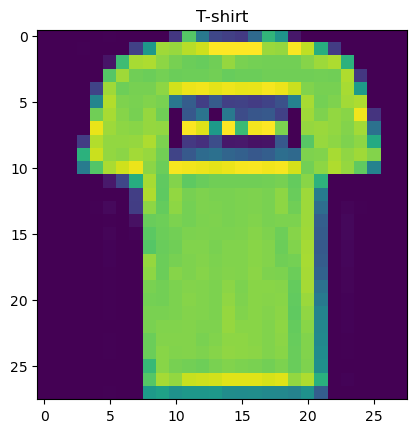

Numerical value equivalent to categorical variable : 0


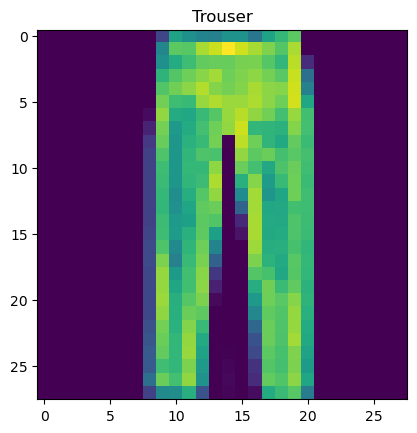

Numerical value equivalent to categorical variable : 0


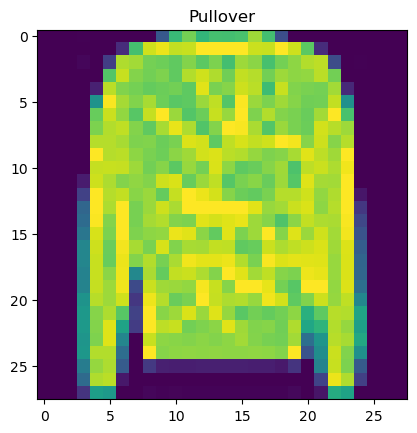

Numerical value equivalent to categorical variable : 3


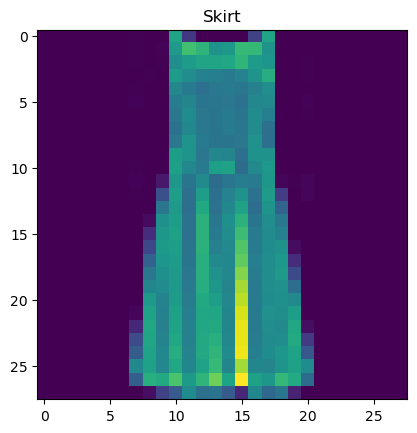

Numerical value equivalent to categorical variable : 0


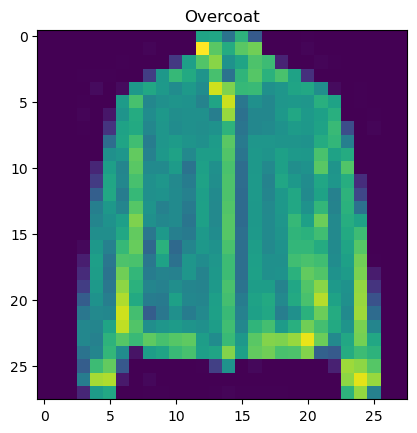

Numerical value equivalent to categorical variable : 2


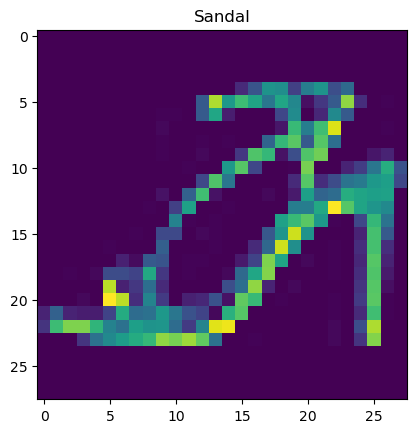

Numerical value equivalent to categorical variable : 7


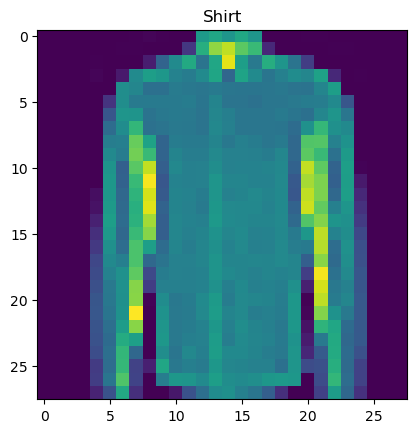

Numerical value equivalent to categorical variable : 2


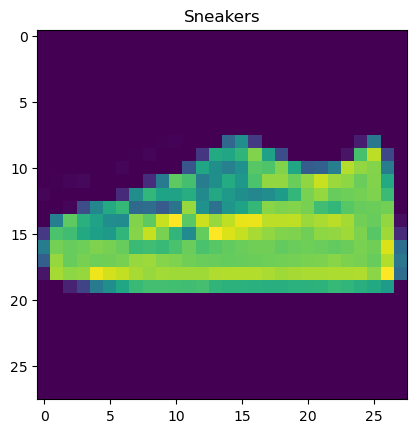

Numerical value equivalent to categorical variable : 5


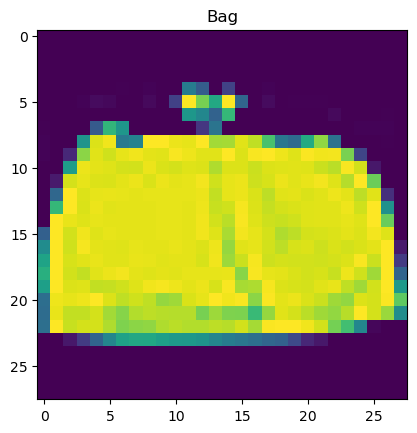

Numerical value equivalent to categorical variable : 5


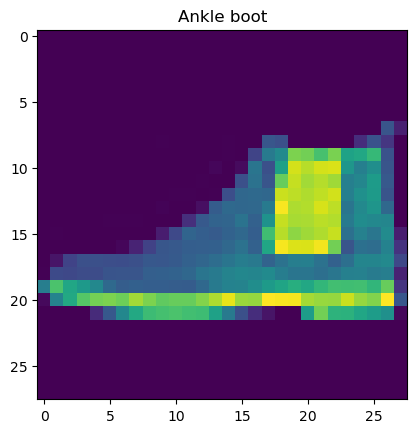

In [5]:
'''Plotting image of each category'''
for i in range(len(attributes)):
    print(f'Numerical value equivalent to categorical variable : {Y_train[i]}')
    plt.imshow(images_list[i], cmap=plt.get_cmap())
    plt.title(attributes[i])
    plt.show()

In [109]:
wandb.init(project="ED22S015_DL_1", name='Assignment_1_sample_imgs')
'''Displaying sample images in wandb'''
wandb.log({"Sample Image from each class": [wandb.Image(image, caption=caption) for image, 
                                            caption in zip(images_list,title)]})

In [6]:
'''CHANGING THE SHAPE OF INPUT DATA'''
x_train=np.zeros((60000,784))
for i in range(X_train.shape[0]):
    a=X_train[i].reshape(1,784)
    x_train[i]=a
print('Train data',x_train.shape)
x_test=np.zeros((10000,784))
for i in range(X_test.shape[0]):
    a=X_test[i].reshape(1,784)
    x_test[i]=a
print('Test data',x_test.shape)

Train data (60000, 784)
Test data (10000, 784)


In [7]:
'''CONVERTING OUTPUT DATA INTO ONE HOT VECTOR FORM'''
a = np.max(Y_train)+1
y_train=np.zeros((Y_train.shape[0],a))
for i in range(Y_train.shape[0]):
    for j in range(a):
        if Y_train[i]==j:
            y_train[i,j]=1
print('Train data',y_train.shape)
y_test=np.zeros((Y_test.shape[0],a))
for i in range(Y_test.shape[0]):
    for j in range(a):
        if Y_test[i]==j:
            y_test[i,j]=1
#print(y_test[0,:])
print('Test data',y_test.shape)

Train data (60000, 10)
Test data (10000, 10)


In [8]:
'''CREATING VALIDATION DATA SET'''
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.10,random_state=42)
x_train=x_train.T/255
y_train=y_train.T
x_test=x_test.T/255
y_test=y_test.T
x_val=x_val.T/255
y_val=y_val.T
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(784, 54000)
(784, 10000)
(784, 6000)


In [9]:
'''ACTIVATION FUNCTIONS'''
#SIGMOID FUNCTION
def sigmoid_function(z):
    h=1/(1+np.exp(-z.astype("float")))
    return h

#TANH FUNCTION
def tanh_function(z):
    h=np.tanh(z.astype("float"))
    return h

#RELU FUNCTION
def relu_function(z):
    h=max(0,z)
    return h

#IDENTITY FUNCTION
def identity_function(z):
    return z


In [10]:
'''OUTPUT LAYER FUNCTION'''

#SOFTMAX FUNCTION
def softmax_function(z):
    expon=np.exp(z.astype("float"))
    h = expon/np.sum(expon,axis=0)
    return h

In [11]:
'''DERIVATIVE FUNCTIONS'''

#DERIVATIVE OF SIGMOID FUNCTION
def sigmoid_function_dash(z):
    h = sigmoid_function(z)
    return h*(1-h)


#DERIVATIVE OF TANH FUNCTION
def tanh_function_dash(z):
    h=tanh_function(z)
    return 1-(h)**2


#DERIVATIVE OF RELU FUNCTION
def relu_function_dash(z):
    h=relu_function(z)
    if h>0:
        return 1
    else:
        return 0
    
#DERIVATIVE OF IDENTITY FUNCTION
def identity_function_dash(z):
    h = identity_function(z)
    return np.ones(h.shape)



In [12]:
#CROSS ENTROPY FUNCTION(DERIVATIVE OF OUTPUT LAYER)
def cross_entropy_function(y,ycap):
    m=y.shape[1]
    cost=-(1/m)*np.sum(y*np.log(ycap))
    return cost
        
#MEAN SQUARED ERROR FUNCTION
def mean_squared_error_function(y,ycap):
    m = y.shape[1]
    a=np.argmax(ycap,axis=0)
    b=np.argmax(y,axis=0)
    mean_square_error = (1/m)*np.sum((a-b)**2)
    return mean_square_error


In [13]:
#INITIALISE PARAMETERS
def random_initialization(layer_attributes):
    '''input:  Layer_attributes is a list consisting of number of 
    neurons in each layer. Here,input layer is considered as 0th Layer, output layer is considered as Lth layer
    and the layers from 1 to (L-1) are considered as hidden layers.Therefore, layer-attributes consists of (L+1) values. '''
    L=len(layer_attributes)-1
    W=[]
    B=[]
    for i in range(1,L+1):
        weight_i = np.random.uniform(-1,1,(layer_attributes[i],layer_attributes[i-1]))
        bias_i=np.zeros((layer_attributes[i],1))
        W.append(weight_i)
        B.append(bias_i)
    return W,B

def xavier_initialization(layer_attributes):
    L=len(layer_attributes)-1
    W=[]
    B=[]
    for i in range(1,L+1):
        lim = np.sqrt(6/(i+(i-1)))
        weight_i = np.random.uniform(-lim,lim,(layer_attributes[i],layer_attributes[i-1]))
        bias_i=np.zeros((layer_attributes[i],1))
        W.append(weight_i)
        B.append(bias_i)
    return W,B
        

In [14]:
#FORWARD PROPOGATION
def forward_propogation(x,w,b,activation='sigmoid_function'):
    
    '''Forward propogation is used to find the predicted value of output and cost function by going forward,starting from 
    input layer until the output layer.We calculate the pre-activation and activation values and returns the latter after each
    layer. The input parameters taken are input data set,weights and bias value, and activation function to be used where the 
    default is set as sigmoid function. Softmax function is used to find the values at the output layer.
    Here,z is the linear part and a is the non-linear part(activation function) of a neuron.'''
    A=[]
    Z=[]
    length=len(w)
    #Hidden layers
    A.append(x)
    for i in range(length-1):
        z_i=np.dot(w[i],A[-1])+b[i]
        Z.append(z_i)
        if activation =='sigmoid_function':
            a_i = sigmoid_function(z_i)
            A.append(a_i)
        elif activation=='tanh_function':
            a_i = tanh_function(z_i)
            A.append(a_i)
        elif activation == 'relu_function':
            a_i = relu_function(z_i)
            A.append(a_i)
        elif activation == 'identity_function':
            a_i = identity_function(z_i)
            A.append(a_i)
    #output layer
    z_l = np.dot(w[-1],A[-1]) + b[-1]
    a_l = softmax_function(z_l)
    A.append(a_l)
    Z.append(z_l)

    return Z,A


In [15]:
#BACK PROPOGATION
def back_propogation(A,y,W,B,Z,activation='sigmoid_function'):
    
    '''Back propogation is used to find the derivatives of each weights and biases at each layers by starting 
    from the output layer and travelling backwards.We find the derivatives wrto ouput layer,wrto hidden layer and eventually
    wrto weights and biases;dw=dJ/dw,db=dJ/db,dz=dJ/dz.'''
    m=y.shape[1]
    L=len(W)
    dW=[]
    dB=[]
    dZ=[]
    #Output Layer
    dZ.append(A[-1]-y)
    dB.append((1/m)*np.sum(dZ[-1],axis=1,keepdims=True))
    dW.append((1/m)*(np.dot(dZ[-1],A[-2].T)))
   
    
    
    #Hidden layers
    l=L-1
    while l >0:
        if activation=='sigmoid_function':
            dz_l = (1/m)*np.dot(W[l].T,dZ[-1])*sigmoid_function_dash(A[l])
            db_l = (1/m)*np.sum(dz_l,axis=1,keepdims=True)
            dw_l = (1/m)*np.dot(dz_l,A[l-1].T)
            dW.append(dw_l)
            dB.append(db_l)
            dZ.append(dz_l)
        
        elif activation == 'relu_function':
            dz_l = (1/m)*np.dot(W[l].T,dZ[-1])*relu_function_dash(A[l])
            db_l = (1/m)*np.sum(dz_l,axis=1,keepdims=True)
            dw_l = (1/m)*np.dot(dz_l,A[l-1].T)
            dW.append(dw_l)
            dB.append(db_l)
            dZ.append(dz_l)
            
        elif activation=='tanh_function':
            dz_l = (1/m)*np.dot(W[l].T,dZ[-1])*tanh_function_dash(A[l])
            db_l = (1/m)*np.sum(dz_l,axis=1,keepdims=True)
            dw_l = (1/m)*np.dot(dz_l,A[l-1].T)
            dW.append(dw_l)
            dB.append(db_l)
            dZ.append(dz_l)
            
        elif activation=='identity_function':
            dz_l = (1/m)*np.dot(W[l].T,dZ[-1])*identity_function_dash(A[l])
            db_l = (1/m)*np.sum(dz_l,axis=1,keepdims=True)
            dw_l = (1/m)*np.dot(dz_l,A[l-1].T)
            dW.append(dw_l)
            dB.append(db_l)
            dZ.append(dz_l)
            
        l=l-1
            
    return dZ[::-1],dW[::-1],dB[::-1]

In [22]:
#OPTIMIZERS
def gradient_descent(W,B,dW,dB,learning_rate):
    '''Mini batch,vanilla and stochastic gradient descents can be performed using this function'''
    alpha=learning_rate
    length=len(W)
    for i in range(length):
        W[i] = W[i] - alpha*dW[i]
        B[i] = B[i] - alpha*dB[i]
    return W,B

def momentum_gradient_descent(w,b,dw,db,learning_rate,momentum,update_w,update_b):
    '''Nesterov accelarated gradient descent can also be implemented as a special case of Momentum gradient descent'''
    for i in range(len(w)):  
        update_w[i] = (momentum*update_w[i]) + dw[i]
        update_b[i] = (momentum*update_b[i]) + db[i]
        w[i] = w[i] - (learning_rate*update_w[i])
        b[i] = b[i] - (learning_rate*update_b[i])
    return w,b,update_w,update_b

def rms_prop(w,b,dw,db,learning_rate,beta,epsilon,v_t_w,v_t_b):
    '''RMSProp is an adaptive learning rate algorithm and the hyperparamteters used here are learning_rate(alpha) and beta.'''
    for i in range(len(w)):
        v_t_w[i] = beta*v_t_w[i] + (1-beta)*((dw[i])**2)
        v_t_b[i] = beta*v_t_b[i] + (1-beta)*((db[i])**2)
        w[i] = w[i] - (learning_rate/(np.sqrt(v_t_w[i]+epsilon)))*dw[i]
        b[i] = b[i] - (learning_rate/(np.sqrt(v_t_b[i]+epsilon)))*db[i]
        return w,b,v_t_w,v_t_b


def adam(w,b,dw,db,learning_rate,beta1,beta2,m_w,m_b,v_w,v_b,epsilon):
    '''Hyperparameters used here are learning_rate(alpha),beta1 and beta2'''
    
    for i in range(len(w)):
        w[i] = w[i] - (learning_rate/(np.sqrt(v_w[i]+epsilon)))*m_w[i]
        b[i] = b[i] - (learning_rate/(np.sqrt(v_b[i]+epsilon)))*m_b[i]
        return w,b,m_w,m_b,v_w,v_b
    
    

In [17]:
#FUNCTION FOR PLOTS
def plot_error(j_train, j_val):
    plt.plot(list(range(len(j_train))), j_train, 'r', label="Train Loss")
    plt.plot(list(range(len(j_val))), j_val, 'lime', label="Validation Loss")
    plt.title("Training and Validation Loss vs No. of Epochs", size=16)
    plt.xlabel("No. of epochs", size=16)
    plt.ylabel("Loss", size=16)
    plt.legend()
    plt.grid()
    plt.show()
    
def plot_accuracy(acc_train, acc_val):
    plt.plot(list(range(len(acc_train))), acc_train, 'r', label="Train Accuracy")
    plt.plot(list(range(len(acc_val))), acc_val, 'lime', label="Validation Accuracy")
    plt.title("Training and Validation Accuracy vs No. of Epochs", size=16)
    plt.xlabel("No. of epochs", size=16)
    plt.ylabel("Accuracy", size=16)
    plt.legend()
    plt.grid()
    plt.show()

In [18]:
def accuracy(y,yout):
    '''Function to find the accuracy taking y and ypred as input and returns accracy value.'''
    yout=np.argmax(yout,axis=0)
    y = np.argmax(y,axis=0)   
    acc=np.mean(y==yout)*100
    return acc
    

In [43]:
def neural_network(x_train,y_train,x_val,y_val,learning_rate = 0.1,momentum = 0.9,beta=0.5,beta1=0.5,beta2=0.5,
                   epochs = 10,num_hidden_layers = 1,neurons=4,batch_size=4,epsilon=0.00000001,weight_init='random_initialization',
                   activation='sigmoid_function',loss='cross_entropy_function',optimizer='stochastic_gradient_descent'):
    layer=[]
    n,m=x_train.shape
    J_train=[]
    Accuracy_train=[]
    J_val=[]
    Accuracy_val=[]
    layer.append(x_train.shape[0])
    for i in range(num_hidden_layers):
        layer.append(neurons)
    layer.append(y_train.shape[0])
    print(f'neuron configuration: {layer}')
    if weight_init=='random_initialization':
        w,b=random_initialization(layer)
    elif weight_init=='xavier_initialization':
        w,b=xavier_initialization(layer)
    update_w=[]
    update_b=[]
    w_lookahead=[]
    b_lookahead=[]
    v_t_w=[]
    v_t_b=[]
    m_w=[]
    m_b=[]
    v_w=[]
    v_b=[]
    for k in range(len(w)):
        upd_w=np.zeros((w[k].shape))
        upd_b=np.zeros((b[k].shape))
        update_w.append(upd_w)
        w_lookahead.append(upd_w)
        update_b.append(upd_b)
        b_lookahead.append(upd_b)
        v_t_w.append(upd_w)
        v_t_b.append(upd_b)
        m_w.append(upd_w)
        m_b.append(upd_b)
        v_w.append(upd_w)
        v_b.append(upd_b)
    
    
    if optimizer=='vanilla_gradient_descent':
        
        for j in range(epochs):
            z,a = forward_propogation(x_train,w,b,activation)
            dz,dw,db=back_propogation(a,y_train,w,b,z,activation)
            w,b=gradient_descent(w,b,dw,db,learning_rate)
            cost_train=cross_entropy_function(y_train,a[-1])
            J_train.append(cost_train)
            acc_train = accuracy(y_train,a[-1])
            Accuracy_train.append(acc_train)
            z_val,a_val = forward_propogation(x_val,w,b,activation)
            cost_val = cross_entropy_function(y_val,a_val[-1])
            J_val.append(cost_val)
            acc_val = accuracy(y_val,a_val[-1])
            Accuracy_val.append(acc_val)
            if j%(epochs/10)==0:
                print(f' \n epoch:{j:4d}  Train error:  {J_train[-1]:8.2f}  Train accuracy: {Accuracy_train[-1]:8.2f} Val error: {J_val[-1]:8.2f} Val accuracy: {Accuracy_val[-1]:8.2f}')
            if j%((epochs/10)/5)==0:
                print('==',end='')
            
    if optimizer=='stochastic_gradient_descent':
        
        
        for j in range(epochs):
            for i in range(m):
                x_data = x_train[:,i].reshape(x_train.shape[0],1)
                y_data = y_train[:,i].reshape(y_train.shape[0],1)
                z,a = forward_propogation(x_data,w,b,activation)
                dz,dw,db=back_propogation(a,y_data,w,b,z,activation)
                w,b=gradient_descent(w,b,dw,db,learning_rate)
            z,a = forward_propogation(x_train,w,b,activation)
            cost_train=cross_entropy_function(y_train,a[-1])
            J_train.append(cost_train)
            acc_train = accuracy(y_train,a[-1])
            Accuracy_train.append(acc_train)
            z_val,a_val = forward_propogation(x_val,w,b,activation)
            cost_val = cross_entropy_function(y_val,a_val[-1])
            J_val.append(cost_val)
            acc_val = accuracy(y_val,a_val[-1])
            Accuracy_val.append(acc_val)
            if j%(epochs/10)==0:
                print(f' \n epoch:{j:4d}  Train error:  {J_train[-1]:8.2f}  Train accuracy: {Accuracy_train[-1]:8.2f} Val error: {J_val[-1]:8.2f} Val accuracy: {Accuracy_val[-1]:8.2f}')
            if j%((epochs/10)/5)==0:
                print('==',end='')
            
    if optimizer=='momentum_gradient_descent':
            
        for j in range(epochs):
            z,a = forward_propogation(x_train,w,b,activation)
            dz,dw,db=back_propogation(a,y_train,w,b,z,activation)
            w,b,update_w,update_b = momentum_gradient_descent(w,b,dw,db,learning_rate,momentum,update_w,update_b)
            cost_train=cross_entropy_function(y_train,a[-1])
            J_train.append(cost_train)
            acc_train = accuracy(y_train,a[-1])
            Accuracy_train.append(acc_train)
            z_val,a_val = forward_propogation(x_val,w,b,activation)
            cost_val = cross_entropy_function(y_val,a_val[-1])
            J_val.append(cost_val)
            acc_val = accuracy(y_val,a_val[-1])
            Accuracy_val.append(acc_val)
            if j%(epochs/10)==0:
                print(f' \n epoch:{j:4d}  Train error:  {J_train[-1]:8.2f}  Train accuracy: {Accuracy_train[-1]:8.2f} Val error: {J_val[-1]:8.2f} Val accuracy: {Accuracy_val[-1]:8.2f}')
            if j%((epochs/10)/5)==0:
                print('==',end='')
                
    if optimizer == 'nesterov_accelarated_gradient_descent':
        
        for j in range(epochs):
            for i in range(len(w)):
                w_lookahead[i] = w[i]-momentum*update_w[i]
                b_lookahead[i] = b[i]-momentum*update_b[i]
                z,a = forward_propogation(x_train,w,b,activation)
            dz,dw,db=back_propogation(a,y_train,w_lookahead,b_lookahead,z,activation)
            w,b,update_w,update_b = momentum_gradient_descent(w,b,dw,db,learning_rate,momentum,update_w,update_b)
            cost_train=cross_entropy_function(y_train,a[-1])
            J_train.append(cost_train)
            acc_train = accuracy(y_train,a[-1])
            Accuracy_train.append(acc_train)
            z_val,a_val = forward_propogation(x_val,w,b,activation)
            cost_val = cross_entropy_function(y_val,a_val[-1])
            J_val.append(cost_val)
            acc_val = accuracy(y_val,a_val[-1])
            Accuracy_val.append(acc_val)
            if j%(epochs/10)==0:
                print(f' \n epoch:{j:4d}  Train error:  {J_train[-1]:8.2f}  Train accuracy: {Accuracy_train[-1]:8.2f} Val error: {J_val[-1]:8.2f} Val accuracy: {Accuracy_val[-1]:8.2f}')
            if j%((epochs/10)/5)==0:
                print('==',end='')
                
                
    if optimizer == 'rms_prop':
            
        for j in range(epochs):
            z,a = forward_propogation(x_train,w,b,activation)
            dz,dw,db=back_propogation(a,y_train,w,b,z,activation)
            w,b,v_t_w,v_t_b = rms_prop(w,b,dw,db,learning_rate,beta,epsilon,v_t_w,v_t_b)
            cost_train=cross_entropy_function(y_train,a[-1])
            J_train.append(cost_train)
            acc_train = accuracy(y_train,a[-1])
            Accuracy_train.append(acc_train)
            z_val,a_val = forward_propogation(x_val,w,b,activation)
            cost_val = cross_entropy_function(y_val,a_val[-1])
            J_val.append(cost_val)
            acc_val = accuracy(y_val,a_val[-1])
            Accuracy_val.append(acc_val)
            if j%(epochs/10)==0:
                print(f' \n epoch:{j:4d}  Train error:  {J_train[-1]:8.2f}  Train accuracy: {Accuracy_train[-1]:8.2f} Val error: {J_val[-1]:8.2f} Val accuracy: {Accuracy_val[-1]:8.2f}')
            if j%((epochs/10)/5)==0:
                print('==',end='')
                
                
    if optimizer == 'adam':
        
        for j in range(epochs):
            z,a = forward_propogation(x_train,w,b,activation)
            dz,dw,db=back_propogation(a,y_train,w,b,z,activation)
            for i in range(len(w)):
                m_w[i] = beta1*m_w[i] + (1-beta1)*dw[i]
                m_b[i] = beta1*m_b[i] + (1-beta1)*db[i]
                v_w[i] = beta2*v_w[i] + (1-beta2)*((dw[i])**2)
                v_b[i] = beta2*v_b[i] + (1-beta2)*((db[i])**2)
                m_w[i] = m_w[i]/(1-beta1**(j+1))
                m_b[i] = m_b[i]/(1-beta1**(j+1))
                v_w[i] = v_w[i]/(1-beta2**(j+1))
                v_b[i] = v_b[i]/(1-beta2**(j+1))
            
            w,b,m_w,m_b,v_w,v_b = adam(w,b,dw,db,learning_rate,beta1,beta2,m_w,m_b,v_w,v_b,epsilon)
            cost_train=cross_entropy_function(y_train,a[-1])
            J_train.append(cost_train)
            acc_train = accuracy(y_train,a[-1])
            Accuracy_train.append(acc_train)
            z_val,a_val = forward_propogation(x_val,w,b,activation)
            cost_val = cross_entropy_function(y_val,a_val[-1])
            J_val.append(cost_val)
            acc_val = accuracy(y_val,a_val[-1])
            Accuracy_val.append(acc_val)
            if j%(epochs/10)==0:
                print(f' \n epoch:{j:4d}  Train error:  {J_train[-1]:8.2f}  Train accuracy: {Accuracy_train[-1]:8.2f} Val error: {J_val[-1]:8.2f} Val accuracy: {Accuracy_val[-1]:8.2f}')
            if j%((epochs/10)/5)==0:
                print('==',end='')
        
                
            
            
                
            
    plot_error(J_train,J_val)
    plot_accuracy(Accuracy_train,Accuracy_val)
        
        
        
        

neuron configuration: [784, 784, 10]
 
 epoch:   0  Train error:     14.79  Train accuracy:    14.93 Val error:    11.49 Val accuracy:    15.17
 epoch:  10  Train error:      4.66  Train accuracy:    40.47 Val error:     3.82 Val accuracy:    44.93
 epoch:  20  Train error:      2.03  Train accuracy:    63.09 Val error:     2.14 Val accuracy:    62.67
 epoch:  30  Train error:      1.63  Train accuracy:    69.98 Val error:     1.63 Val accuracy:    69.33
 epoch:  40  Train error:      1.42  Train accuracy:    73.34 Val error:     1.39 Val accuracy:    73.23
 epoch:  50  Train error:      1.26  Train accuracy:    74.43 Val error:     1.26 Val accuracy:    74.67
 epoch:  60  Train error:      1.16  Train accuracy:    74.90 Val error:     1.17 Val accuracy:    74.97
 epoch:  70  Train error:      1.09  Train accuracy:    75.58 Val error:     1.10 Val accuracy:    75.45
 epoch:  80  Train error:      1.04  Train accuracy:    75.99 Val error:     1.04 Val accuracy:    75.88
 epoch:  90  Tra

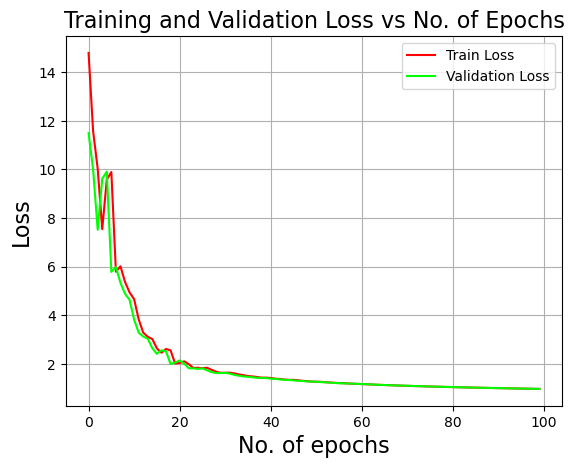

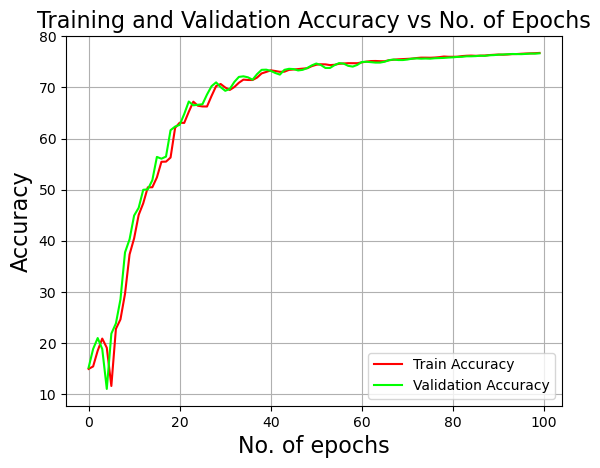

In [243]:
'''Momentum gradient descent'''
neural_network(x_train,y_train,x_val,y_val,optimizer='momentum_gradient_descent',momentum=0.9,epochs=100,neurons=784,num_hidden_layers=1)

neuron configuration: [784, 784, 10]
 
 epoch:   0  Train error:     20.97  Train accuracy:     3.98 Val error:    14.93 Val accuracy:    13.67
 epoch:  10  Train error:      4.92  Train accuracy:    19.19 Val error:     4.81 Val accuracy:    19.38
 epoch:  20  Train error:      3.66  Train accuracy:    30.88 Val error:     3.62 Val accuracy:    30.68
 epoch:  30  Train error:      3.03  Train accuracy:    39.01 Val error:     3.03 Val accuracy:    38.92
 epoch:  40  Train error:      2.66  Train accuracy:    44.51 Val error:     2.68 Val accuracy:    43.80
 epoch:  50  Train error:      2.41  Train accuracy:    48.14 Val error:     2.43 Val accuracy:    47.45
 epoch:  60  Train error:      2.23  Train accuracy:    51.10 Val error:     2.25 Val accuracy:    50.47
 epoch:  70  Train error:      2.10  Train accuracy:    53.49 Val error:     2.12 Val accuracy:    52.72
 epoch:  80  Train error:      1.99  Train accuracy:    55.35 Val error:     2.01 Val accuracy:    54.53
 epoch:  90  Tra

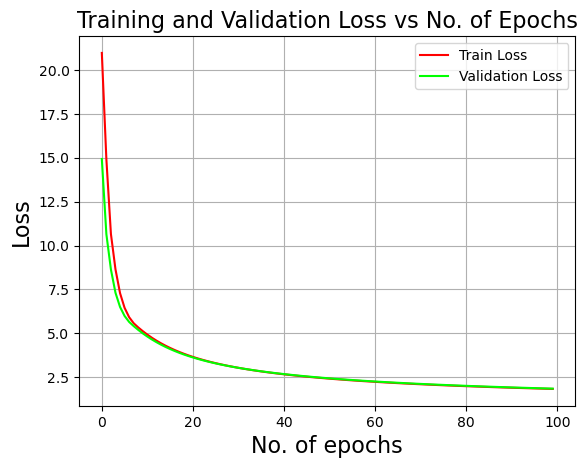

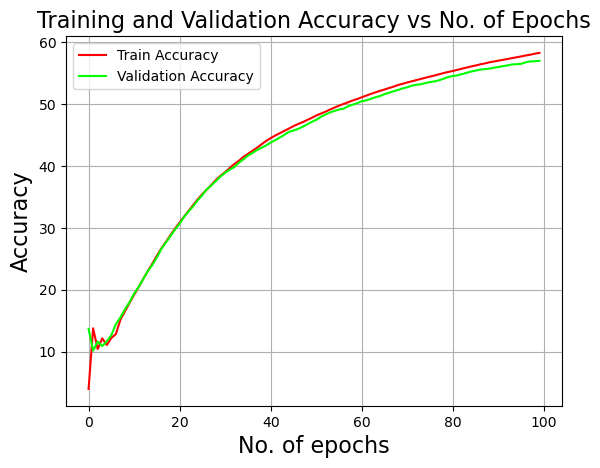

In [313]:
'''Vanilla Gradient Descent'''
neural_network(x_train,y_train,x_val,y_val,optimizer='vanilla_gradient_descent',epochs=100,neurons=784,num_hidden_layers=1)

neuron configuration: [784, 128, 10]
 
 epoch:   0  Train error:      5.97  Train accuracy:    18.74 Val error:     5.96 Val accuracy:    18.10
 epoch:  10  Train error:      3.13  Train accuracy:    20.91 Val error:     3.11 Val accuracy:    20.92
 epoch:  20  Train error:      2.34  Train accuracy:    28.04 Val error:     2.34 Val accuracy:    28.17
 epoch:  30  Train error:      1.99  Train accuracy:    35.65 Val error:     2.00 Val accuracy:    34.93
 epoch:  40  Train error:      1.76  Train accuracy:    41.42 Val error:     1.78 Val accuracy:    40.88
 epoch:  50  Train error:      1.61  Train accuracy:    45.73 Val error:     1.62 Val accuracy:    45.35
 epoch:  60  Train error:      1.49  Train accuracy:    49.20 Val error:     1.51 Val accuracy:    48.37
 epoch:  70  Train error:      1.40  Train accuracy:    51.78 Val error:     1.42 Val accuracy:    50.87
 epoch:  80  Train error:      1.33  Train accuracy:    53.90 Val error:     1.34 Val accuracy:    52.87
 epoch:  90  Tra

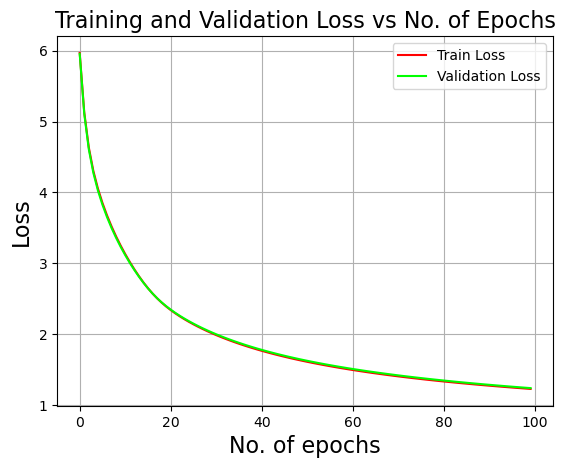

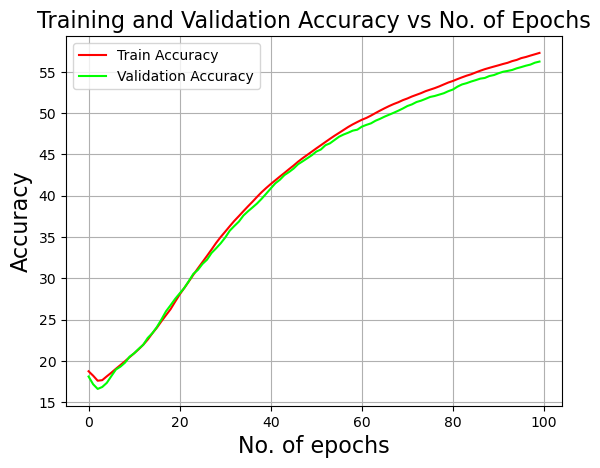

In [241]:
'''Stochastic gradient descent'''
neural_network(x_train,y_train,x_val,y_val,optimizer='stochastic_gradient_descent',epochs=100,learning_rate=0.000001,neurons=128)

neuron configuration: [784, 784, 10]
 
 epoch:   0  Train error:     12.88  Train accuracy:     5.76 Val error:     9.95 Val accuracy:    11.57
 epoch:  10  Train error:      3.33  Train accuracy:    41.18 Val error:     3.06 Val accuracy:    47.58
 epoch:  20  Train error:      1.74  Train accuracy:    66.65 Val error:     1.74 Val accuracy:    67.37
 epoch:  30  Train error:      1.53  Train accuracy:    71.42 Val error:     1.54 Val accuracy:    71.43
 epoch:  40  Train error:      1.34  Train accuracy:    73.91 Val error:     1.34 Val accuracy:    73.50
 epoch:  50  Train error:      1.22  Train accuracy:    75.13 Val error:     1.22 Val accuracy:    74.58
 epoch:  60  Train error:      1.12  Train accuracy:    75.91 Val error:     1.12 Val accuracy:    75.32
 epoch:  70  Train error:      1.05  Train accuracy:    76.31 Val error:     1.05 Val accuracy:    75.97
 epoch:  80  Train error:      1.00  Train accuracy:    76.75 Val error:     1.00 Val accuracy:    76.50
 epoch:  90  Tra

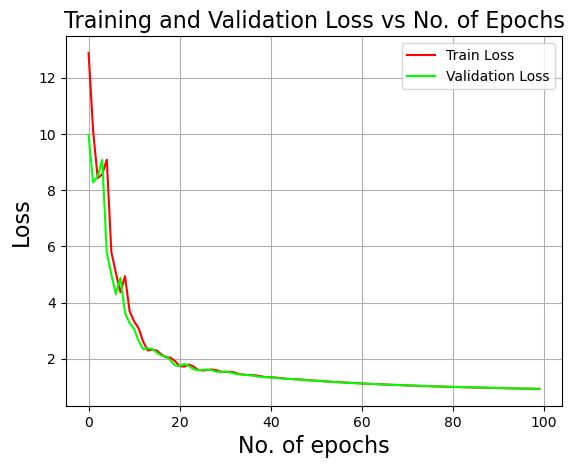

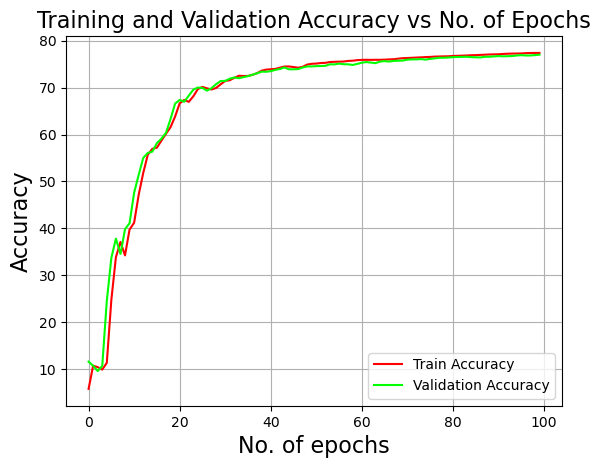

In [245]:
'''Nesterov accelarated gradient descent(NAG)'''
neural_network(x_train,y_train,x_val,y_val,optimizer='nesterov_accelarated_gradient_descent',epochs=100,neurons=784)

neuron configuration: [784, 784, 10]
 
 epoch:   0  Train error:     11.91  Train accuracy:     7.63 Val error:     8.06 Val accuracy:     8.12
 epoch:  10  Train error:      2.97  Train accuracy:    44.79 Val error:     2.83 Val accuracy:    44.65
 epoch:  20  Train error:      2.71  Train accuracy:    55.41 Val error:     2.46 Val accuracy:    51.68
 epoch:  30  Train error:      2.25  Train accuracy:    60.28 Val error:     2.27 Val accuracy:    56.22
 epoch:  40  Train error:      2.15  Train accuracy:    63.34 Val error:     2.10 Val accuracy:    59.97
 epoch:  50  Train error:      2.09  Train accuracy:    65.48 Val error:     1.82 Val accuracy:    62.50
 epoch:  60  Train error:      2.01  Train accuracy:    66.29 Val error:     1.93 Val accuracy:    62.98
 epoch:  70  Train error:      1.81  Train accuracy:    67.27 Val error:     1.92 Val accuracy:    63.10
 epoch:  80  Train error:      1.90  Train accuracy:    68.63 Val error:     1.64 Val accuracy:    66.08
 epoch:  90  Tra

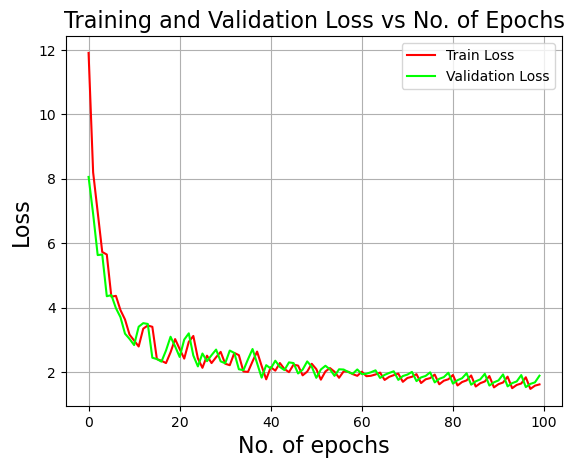

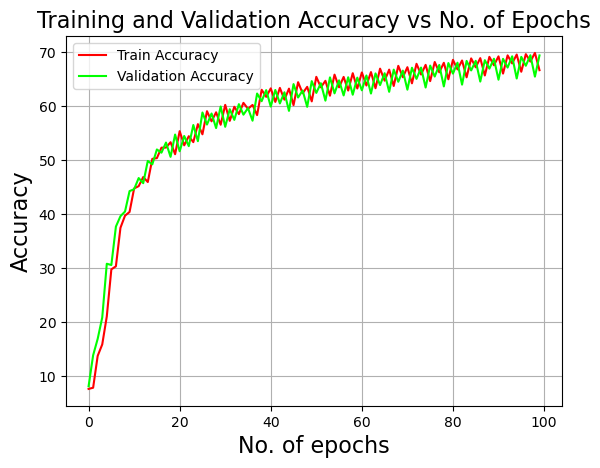

In [312]:
'''RMSProp'''
neural_network(x_train,y_train,x_val,y_val,optimizer='rms_prop',epochs=100,neurons=784,beta=0.9,learning_rate=1)

In [ ]:
'''Adam(Adaptive Moments)'''
neural_network(x_train,y_train,x_val,y_val,optimizer='adam',epochs=100,neurons=8,weight_init='xavier_initialization',beta1=0.9,beta2=0.99,learning_rate=0.1,num_hidden_layers=1)

neuron configuration: [784, 8, 10]
 
 epoch:   0  Train error:      3.63  Train accuracy:     8.72 Val error:     3.64 Val accuracy:     8.53
 epoch:  10  Train error:      2.79  Train accuracy:    13.69 Val error:     2.81 Val accuracy:    13.43
 epoch:  20  Train error:      2.79  Train accuracy:    13.69 Val error:     2.81 Val accuracy:    13.43
 epoch:  30  Train error:      2.79  Train accuracy:    13.69 Val error:     2.81 Val accuracy:    13.43
 epoch:  40  Train error:      2.79  Train accuracy:    13.69 Val error:     2.81 Val accuracy:    13.43
 epoch:  50  Train error:      2.79  Train accuracy:    13.69 Val error:     2.81 Val accuracy:    13.43
 epoch:  60  Train error:      2.79  Train accuracy:    13.69 Val error:     2.81 Val accuracy:    13.43
 epoch:  70  Train error:      2.79  Train accuracy:    13.69 Val error:     2.81 Val accuracy:    13.43
 epoch:  80  Train error:      2.79  Train accuracy:    13.69 Val error:     2.81 Val accuracy:    13.43
 epoch:  90  Train